#Task 1 - Prediction using Supervised Machine learning
##Name : Ankur Singh
##GRIPMAY21
##The Spark Foundation

In [31]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# Reading dataset
data_path = r"http://bit.ly/w-data"
data = pd.read_csv(data_path)

In [6]:
data.shape

(25, 2)

In [7]:
# Showing whole dataset
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##Visualising Data

In [ ]:
#Describing the dataset:

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# Check if there any null value in the Dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

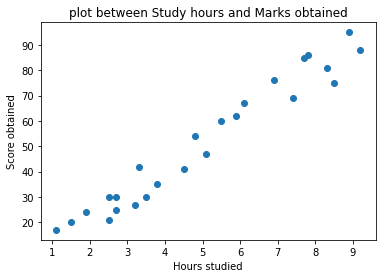

In [9]:
plt.scatter(x = data.Hours, y = data.Scores)
plt.xlabel("Hours studied")
plt.ylabel("Score obtained")
plt.title("plot between Study hours and Marks obtained")
plt.show()

##Training of Machine Learning

Spliting Data sets

In [11]:
x = data.drop("Scores", axis = "columns")
y = data.drop("Hours", axis = "columns")
print("shape of x = ", x.shape)
print("shape of y = ", y.shape)

shape of x =  (25, 1)
shape of y =  (25, 1)


In [19]:
#using Scikit-Learn's built-in train_test_split() method to split this data into training and test sets and displaying their shapes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
print("shape of X_train = ", x_train.shape)
print("shape of X_test = ", x_test.shape)
print("shape of y_train = ", y_train.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (20, 1)
shape of X_test =  (5, 1)
shape of y_train =  (20, 1)
shape of y_test =  (5, 1)


##Model Selection

In [21]:
#Using LinearRegression model
# y= m*x + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Model trained successfully")

Model trained successfully


In [22]:
lr.coef_


array([[9.91065648]])

In [23]:
lr.intercept_

array([2.01816004])

##Comparing Predicted Vs Obtained score

In [24]:
y_pred = lr.predict(x_test)
pd.DataFrame(np.c_[x_test, y_test, y_pred], columns = ["Hours", "Scores_original" , "Scores_predicted"])

,Hours,Scores_original,Scores_predicted
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


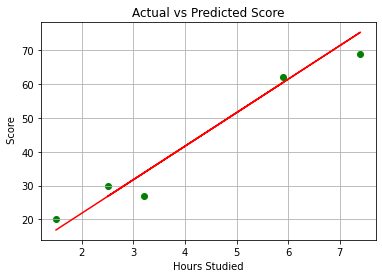

In [25]:
plt.scatter(x_test, y_test, color="green")
plt.plot(x_test, y_pred, color="red")
plt.title("Actual vs Predicted Score")
plt.ylabel(" Score")
plt.xlabel("Hours Studied")
plt.grid()
plt.show()

###Accuracy of Model

In [27]:
Accuracy = lr.score(x_test, y_test)*100
print(" Accuracy Of model is ", Accuracy ,"% ")

 Accuracy Of model is  94.54906892105353 % 


#Prediction
What will be predicted score if a student studies for 9.25 hrs/ day?

In [30]:
hours = [9.25]
answer = lr.predict([hours])
print("Predicted score if a student studies for 9.25 hrs/ day: {}".format(np.round(answer[0][0],2)))


Predicted score if a student studies for 9.25 hrs/ day: 93.69
